In [1]:
import os
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib
import pandas as pd
import numpy as np

## 线性回归

In [6]:
"""
线性回归直接预测房子价格
:return: None
"""
# 获取数据
fe_cal = fetch_california_housing(data_home='../data')

print("获取特征值")
print(fe_cal.data.shape)
print('-' * 50)
print(fe_cal.data[0])
print("目标值")
print(fe_cal.target) #单位是10万美金
# print(fe_cal.DESCR)
print('-' * 50)
print(fe_cal.feature_names) #特征列的名字

获取特征值
(20640, 8)
--------------------------------------------------
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
目标值
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
--------------------------------------------------
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [24]:
# 分割数据集到训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(fe_cal.data, fe_cal.target, test_size=0.25, random_state=1)
#
print(x_train.shape)
#
# # 进行标准化处理(?) 目标值处理？
# # 特征值和目标值是都必须进行标准化处理, 实例化两个标准化API
std_x = StandardScaler()
#
x_train = std_x.fit_transform(x_train) #训练集标准化
x_test = std_x.transform(x_test) #测试集标准化
# print(y_train.shape)
# 目标值进行了标准化，暂时没有对目标值进行标准化处理
std_y = StandardScaler()
#
# #标签进行标准化
# 目标值是一维的，这里需要传进去2维的
y_train = std_y.fit_transform(y_train.reshape(-1, 1))
print(y_train.shape)

(15480, 8)
(15480, 1)


In [8]:
temp = y_train.reshape(-1, 1) #-1代表把剩余的元素都堆到哪一维
print(temp.shape)

(15480, 1)


### 未对目标值进行标准化处理的训练代码

In [22]:
# # estimator预测
# # # 正规方程求解方式预测结果，正规方程进行线性回归
lr = LinearRegression()
# fit是耗时的
lr.fit(x_train, y_train)
#回归系数可以看特征与目标之间的相关性
print('回归系数', lr.coef_)
#
y_predict = lr.predict(x_test)
# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
#保存模型放在fit之后即可
os.unlink('../tmp/test.pkl') # 删除之前的模型文件
joblib.dump(lr, "../tmp/test.pkl")
print("正规方程测试集里面每个房子的预测价格：", y_predict[0:10])
#下面是求测试集的损失，用均方误差，公式是(y_test-y_predict)^2/n
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

回归系数 [ 0.83167028  0.12159502 -0.26758589  0.30983997 -0.00518054 -0.04040421
 -0.90736902 -0.88212727]
正规方程测试集里面每个房子的预测价格： [2.12391852 0.93825754 2.7088455  1.70873764 2.82954754 3.50376456
 3.0147162  1.62781292 1.74317518 2.01897806]
正规方程的均方误差： 0.5356532845422556


### 对目标值进行标准化处理的训练代码

In [25]:
lr = LinearRegression()
# fit是耗时的
lr.fit(x_train, y_train)
#回归系数可以看特征与目标之间的相关性
print('回归系数', lr.coef_)
#
y_predict = lr.predict(x_test)
# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
# 预测测试集的房子价格，通过inverse得到真正的房子价格
y_lr_predict = std_y.inverse_transform(y_predict)
#保存模型放在fit之后即可
os.unlink('../tmp/test.pkl') # 删除之前的模型文件
joblib.dump(lr, "../tmp/test.pkl")
print("正规方程测试集里面每个房子的预测价格：", y_lr_predict[0:10])
print("正规方程的均方误差：", mean_squared_error(y_test, y_lr_predict))

回归系数 [[ 0.71942632  0.10518431 -0.23147194  0.26802332 -0.00448136 -0.03495117
  -0.7849086  -0.76307353]]
正规方程测试集里面每个房子的预测价格： [[2.12391852]
 [0.93825754]
 [2.7088455 ]
 [1.70873764]
 [2.82954754]
 [3.50376456]
 [3.0147162 ]
 [1.62781292]
 [1.74317518]
 [2.01897806]]
正规方程的均方误差： 0.5356532845422556


In [26]:
#模拟上线时加载模型
model = joblib.load("../tmp/test.pkl")
# # 因为目标值进行了标准化，一定要把预测后的值逆向转换回来
y_predict = model.predict(x_test)

#
# print("保存的模型预测的结果：", y_predict[0:10])
# print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))
print("保存的y标准化后的模型预测的结果：", std_y.inverse_transform(y_predict)[0:10])
print("正规方程inverse后的均方误差：", mean_squared_error(y_test,
                                               std_y.inverse_transform(y_predict)))

保存的y标准化后的模型预测的结果： [[2.12391852]
 [0.93825754]
 [2.7088455 ]
 [1.70873764]
 [2.82954754]
 [3.50376456]
 [3.0147162 ]
 [1.62781292]
 [1.74317518]
 [2.01897806]]
正规方程inverse后的均方误差： 0.5356532845422556


## 线性回归之梯度下降去进行房价预测

In [49]:
# 梯度下降去进行房价预测,数据量大要用这个
# learning_rate的不同方式，代表学习率变化的算法不一样,比如constant,invscaling,adaptive
# 默认可以去调 eta0 = 0.008，会改变learning_rate的初始值
# learning_rate='optimal',alpha是正则化力度，但是会影响学习率的值，由alpha来算学习率
# penalty代表正则化，分为l1和l2
# eta0=0.01, penalty='l2',max_iter=1000
sgd = SGDRegressor(eta0=0.01,penalty='l2', max_iter=1000)
# # 训练
sgd.fit(x_train, y_train)
#
print('梯度下降的回归系数', sgd.coef_)
#
# 预测测试集的房子价格
# y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_predict = sgd.predict(x_test)
# print("梯度下降测试集里面每个房子的预测价格：", y_sgd_predict)
print("梯度下降的均方误差：", mean_squared_error(y_test, y_predict))
# print("梯度下降的原始房价量纲均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

梯度下降的回归系数 [ 7.14990147e-01  1.06442101e-01 -2.04429886e-01  3.19144216e-01
  6.12059244e-04 -1.38287446e-01 -7.66322066e-01 -7.54480649e-01]
梯度下降的均方误差： 4.719807277248123


D:\Software\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 岭回归

In [50]:
# # # 岭回归去进行房价预测
#岭回归是对线性回归加入L2正则化，L2正则化是对系数的平方和进行惩罚
#alpha就是补偿的系数
#正规方程求解，加补偿就可以让正规方程可逆
rd = Ridge(alpha=0.02)

rd.fit(x_train, y_train)

print(rd.coef_)
#
# # 预测测试集的房子价格
print(rd.predict(x_test).shape)
# y_rd_predict = std_y.inverse_transform(rd.predict(x_test))
y_predict = rd.predict(x_test)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print("岭回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("岭回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

[ 0.71942576  0.10518585 -0.23146889  0.26801931 -0.00448083 -0.03495127
 -0.78489401 -0.76305881]
(5160,)
岭回归的均方误差： 4.770500491883886


## Lasso回归

In [51]:
# # # Lasso回归去进行房价预测
#alpha就是补偿的系数
print(x_train.shape)
print(y_train.shape)
ls = Lasso(alpha=0.001)

ls.fit(x_train, y_train)

print(ls.coef_)
#
# # 预测测试集的房子价格
print(ls.predict(x_test).shape)
print('-'*50)
# y_ls_predict = std_y.inverse_transform(ls.predict(x_test).reshape(-1,1))
y_predict = ls.predict(x_test)
# print("Lasso回归里面每个房子的预测价格：", y_rd_predict)
#
print("Lasso回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("Lasso回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_ls_predict))

(15480, 8)
(15480, 1)
[ 0.71431792  0.10613811 -0.21758465  0.25415162 -0.00311065 -0.03403136
 -0.77399969 -0.75154125]
(5160,)
--------------------------------------------------
Lasso回归的均方误差： 4.770944530791325


## 逻辑回归

In [53]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
:return: NOne
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv(
    "../data/breast-cancer-wisconsin.csv",
    names=column)
# print(data) #想看可以解除
#当你读取数据时，看上去是数值的列，读进来是字符串，说明里边
# 存在了非数值情况
print(data.info())
print('-'*50)
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
--------------------------------------------------


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [54]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
#直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()
print('-' * 50)
print(data.shape)

--------------------------------------------------
(683, 11)


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [56]:
#分类的类别是2和4,对应 "良性", "恶性"
data[column[10]].unique()

array([2, 4])

In [57]:
#把第6列的字符串转化为数字类型
data[column[6]] = data[column[6]].astype('int16')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int16
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int16(1), int64(10)
memory usage: 60.0 KB


In [59]:
# 进行数据的分割,第零列是编号，不可以作为特征，把第1-9列作为特征，第10列作为标签
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,
                                                    random_state=1)

# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train) #训练集标准化
x_test = std.transform(x_test) #测试集标准化
x_train[0]

array([-1.21629973, -0.70863282, -0.75174943,  0.04301674, -0.55657068,
       -0.71054972, -0.99312055, -0.62911518, -0.36280962])

In [60]:
#
# # 逻辑回归预测
# C正则化力度,跟学习率有关
# solver = 'liblinear'  solver是学习率优化算法，就是学习率会随着epoch的变化而变化
#epoch就代表第几次迭代
#max_iter 最大迭代次数
lg = LogisticRegression(C=0.5, solver='lbfgs')
#
lg.fit(x_train, y_train)
# 逻辑回归的权重参数，了解，没那么重要
print(lg.coef_)

y_predict = lg.predict(x_test)
# print(y_predict) #预测的标签
print("准确率：", lg.score(x_test, y_test))
print(y_test[0:5])
print('-'*50)
print(lg.predict_proba(x_test)[0:5])  #得出对应分类的概率


[[1.11400191 0.25293086 0.78938469 0.60986034 0.0728013  1.10834397
  0.7794668  0.64312128 0.67692658]]
准确率： 0.9824561403508771
444    2
24     2
195    2
49     4
375    2
Name: Class, dtype: int64
--------------------------------------------------
[[0.94893919 0.05106081]
 [0.99494175 0.00505825]
 [0.98365149 0.01634851]
 [0.02707911 0.97292089]
 [0.99732446 0.00267554]]


In [62]:
# 为什么还要看下召回率，labels和target_names对应
# macro avg 平均值  weighted avg 加权平均值
print(classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))
#AUC计算要求是二分类，不需要是0和1
print("AUC指标：", roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标： 0.975


## 聚类

In [63]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [64]:
# 读取四张表的数据
#读取了订单和产品id的关联，csv比较大
prior = pd.read_csv("../data/instacart/order_products__prior.csv")

In [65]:
#产品id，与过道的对应
products = pd.read_csv("../data/instacart/products.csv")

In [66]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("../data/instacart/orders.csv")

In [67]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("../data/instacart/aisles.csv")

In [68]:
prior.head()  #订单id，产品id，下面只需要掌握订单和产品的关联即可

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [69]:
products.head() #产品id，产品名称，过道id

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [70]:
orders.head() #订单id，用户id

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [71]:
aisles.head() #过道id，对应过道里放了哪些产品类别

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [72]:
# 合并四张表到一张表  （用户-物品类别），在这里挂了，用下阿里云
#订单表和产品表关联
#用户买了哪些订单，订单里面有哪些产品，产品对应的过道，过道对应的产品类别
_ = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [73]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,205970,prior,16,5,17,12.0,yogurt


In [74]:
mt.shape

(32434489, 14)

In [75]:
mt.isnull().sum()/mt.shape[0]  #数据缺失率，没有缺失值

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
aisle                     0.00000
dtype: float64

In [76]:
# 交叉表（特殊的分组工具），如果在这一步内存不够了，重启一下jupyter，还是不行，筛选一部分用户的数据，进行聚类
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [77]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [78]:
#针对20万用户，有134个特征(代表超市里有134个过道）
cross.shape

(206209, 134)

In [79]:
# 进行主成分分析,那么大家还记得不？，保留90%的成分，实际特征数目减少了几倍，134--》27
pca = PCA(n_components=0.9)

In [80]:
data = pca.fit_transform(cross)  #还记得fit_transform的作用不？
data.shape

(206209, 27)

In [81]:
type(data)

numpy.ndarray

In [83]:
# 把样本数量减少,为了下面画图方便，这里只取500个样本
# x = data[:500]
x = data
x.shape

(206209, 27)

In [84]:
# 假设用户一共分为四个类别
#n_clusters是分为几个类别，是主要的超参
km = KMeans(n_clusters=4)

In [85]:
km.fit(x)  #开始训练

KMeans(n_clusters=4)

In [86]:
#开始预测
predict = km.predict(x)

In [87]:
print(predict)  #预测得到的是每一个样本的类别

[0 1 0 ... 1 3 0]


In [88]:
np.unique(predict)

array([0, 1, 2, 3], dtype=int32)

In [89]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

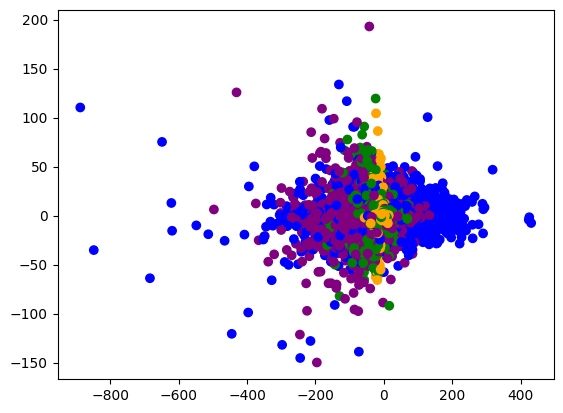

In [90]:
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict] #根据类别给每个样本赋予颜色
#去选择任意两个特征来看聚类的图，可以自行调整,第2个，第20个特征
plt.scatter(x[:, 1], x[:, 19], color=colr)

In [91]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

np.float64(0.43785532425187057)

In [92]:
# 通过分类后数据，去看原始样本的特点
cross.iloc[0]

aisle
air fresheners candles           0
asian foods                      0
baby accessories                 0
baby bath body care              0
baby food formula                0
                                ..
trash bags liners                0
vitamins supplements             0
water seltzer sparkling water    0
white wines                      0
yogurt                           1
Name: 1, Length: 134, dtype: int64

In [94]:
predict[26]

np.int32(3)

In [95]:
cross.iloc[26]

aisle
air fresheners candles             0
asian foods                        4
baby accessories                   0
baby bath body care                0
baby food formula                  0
                                ... 
trash bags liners                  0
vitamins supplements               0
water seltzer sparkling water     92
white wines                        0
yogurt                           150
Name: 27, Length: 134, dtype: int64

In [96]:
#改为3时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)

np.float64(0.5492836544423105)